In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
print(os.listdir(path))

Mounted at /content/drive
['Prajna Non-Tech MS Resume.docx.pdf', 'Colab Notebooks', 'HW_5_prajna_gopalhardikar_report.gdoc', 'Practice_code.ipynb', 'Prajna Non-Tech MS Resume.pdf', 'HW_7_prajna_gopalhardikar_report.gdoc', 'HW_10_prajna_gopalhardikar_report.gdoc', 'Resume', 'FinalExam_prajna_gopalhardikar_report.gdoc', 'HW 1 Report.gdoc', 'test.csv', 'train.csv', 'Prajna_Hardikar_Resume.pdf', 'ISE 543', 'Workbook 4 - Rubrics.xlsx', 'SVC.ipynb', 'HW 2 Report.gdoc', 'Prajna Gopal Hardikar - CPT Employer Letter.pdf', 'heart_log_val_0.csv', 'test.xes', 'test.pnml', 'final_dataset.csv', 'SA_AKI.csv', 'final.csv']


In [ ]:
train_data = pd.read_csv(path+'SA_AKI.csv')

In [ ]:
train_data

,subject_id,gender,age,diabetes,hypertension,chronic_kidney_disease,sepsis,cardiovascular_disease,Albumin,"Albumin/Creatinine, Urine",...,Potassium,Respiratory Rate,Sodium,SpO2 Desat Limit,Temperature Celsius,Urea Nitrogen,WBC Count,pO2,SOFA,mortality
0,10002430,M,86,0,1,1,0,0,3.8,23.1,...,3.5,27.0,143.0,85.0,NaN,57.0,NaN,59.0,2.0,1
1,10004235,M,47,0,1,1,0,1,2.6,NaN,...,4.1,18.0,129.0,85.0,NaN,57.0,NaN,258.0,4.0,0
2,10004401,M,82,0,1,1,0,1,4.4,NaN,...,4.0,26.0,140.0,85.0,NaN,20.0,NaN,99.0,1.0,1
3,10004733,M,51,0,0,1,0,0,2.9,480.0,...,3.3,17.0,144.0,85.0,NaN,26.0,NaN,100.0,2.0,0
4,10004764,M,70,0,1,0,0,0,NaN,NaN,...,3.7,22.0,138.0,85.0,NaN,23.0,NaN,90.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,19997367,F,63,0,0,1,0,1,4.0,NaN,...,3.5,27.0,140.0,85.0,NaN,20.0,NaN,95.0,0.0,0
10756,19997448,F,52,0,0,0,0,0,3.5,NaN,...,4.6,34.0,140.0,85.0,NaN,11.0,NaN,418.0,0.0,0
10757,19997473,F,82,0,0,1,0,0,3.6,NaN,...,4.1,23.0,133.0,85.0,36.6,32.0,NaN,59.0,1.0,0
10758,19997752,F,66,0,0,0,0,0,3.8,NaN,...,4.2,16.0,140.0,85.0,NaN,22.0,NaN,101.0,1.0,0


In [ ]:
print("Clinic Data:")
train_data.drop(columns=['SOFA'],inplace=True)

Clinic Data:


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   subject_id                           10760 non-null  int64  
 1   gender                               10760 non-null  object 
 2   age                                  10760 non-null  int64  
 3   diabetes                             10760 non-null  int64  
 4   hypertension                         10760 non-null  int64  
 5   chronic_kidney_disease               10760 non-null  int64  
 6   sepsis                               10760 non-null  int64  
 7   cardiovascular_disease               10760 non-null  int64  
 8   Albumin                              10061 non-null  float64
 9   Albumin/Creatinine, Urine            1595 non-null   float64
 10  Anion Gap                            10758 non-null  float64
 11  Arterial Blood Pressure dias

In [ ]:
gender_mapping = {'M': 1, 'F': 0}

# Map the values in the 'gender' column
train_data['gender'] = train_data['gender'].map(gender_mapping)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   subject_id                           10760 non-null  int64  
 1   gender                               10760 non-null  int64  
 2   age                                  10760 non-null  int64  
 3   diabetes                             10760 non-null  int64  
 4   hypertension                         10760 non-null  int64  
 5   chronic_kidney_disease               10760 non-null  int64  
 6   sepsis                               10760 non-null  int64  
 7   cardiovascular_disease               10760 non-null  int64  
 8   Albumin                              10061 non-null  float64
 9   Albumin/Creatinine, Urine            1595 non-null   float64
 10  Anion Gap                            10758 non-null  float64
 11  Arterial Blood Pressure dias

CALCULATING SAPS II SCORE

In [ ]:
import pandas as pd

# Define the function to calculate SAPS II score
def calculate_saps2_score(row):
    score = 0

    # Age (years)
    if not pd.isna(row["age"]):
        if row["age"] < 40:
            score += 0
        else:
            score += 0

    # Heart Rate(beats/min)
    if not pd.isna(row["Heart Rate"]):
        if row["Heart Rate"] < 40:
            score += 11
        elif 40 <= row["Heart Rate"] <= 69:
            score += 2
        elif 70 <= row["Heart Rate"] <= 119:
            score += 0

    # Systolic BP, mm Hg
    if not pd.isna(row["Arterial Blood Pressure systolic"]):
        if row["Arterial Blood Pressure systolic"] < 70:
            score += 13
        elif 70 <= row["Arterial Blood Pressure systolic"] <= 99:
            score += 5
        elif 100 <= row["Arterial Blood Pressure systolic"] <= 199:
            score += 0

    # Body Temperature (C)
    if not pd.isna(row["Temperature Celsius"]):
        if row["Temperature Celsius"] < 39:
            score += 0

    # PaO2, mm kPa/FIO2
    if not pd.isna(row["pO2"]):
        if row["pO2"] < 100:
            score += 11
        elif 100 <= row["pO2"] < 199:
            score += 9
        else:
            score += 6
            '''

    # Urinary output L/d
    if not pd.isna(row["Albumin/Creatinine, Urine"]):
        if row["Albumin/Creatinine, Urine"] < 0.5:
            score += 0
        elif 0.5 <= row["Albumin/Creatinine, Urine"] < 1.0:
            score += 6
        else:
            score += 0
            '''

    # Serum urea level(g/L) or serum urea nitrogen level mg/Dl
    if not pd.isna(row["Urea Nitrogen"]):
        if row["Urea Nitrogen"] < 28:
            score += 0
        else:
            score += 0

    if not pd.isna(row["WBC Count"]):
        if row["WBC Count"] < 1.0:
            score += 12
        elif row["WBC Count"] < 20.0:
            score += 0

    # Serum Pottasium
    if not pd.isna(row["Potassium"]):
        if row["Potassium"] < 3.0:
            score += 5
        elif 3.0 <= row["Potassium"] < 5.0:
            score += 0

    # Serum Sodium Level
    if not pd.isna(row["Sodium"]):
        if row["Sodium"] < 125:
            score += 5
        elif 125 <= row["Sodium"] <= 145:
            score += 0

    # Serum Bicarbonate Level
    if not pd.isna(row["Calculated Bicarbonate, Whole Blood"]):
        if row["Calculated Bicarbonate, Whole Blood"] < 15:
            score += 6
        elif 15 <= row["Calculated Bicarbonate, Whole Blood"] < 20:
            score += 3

    # Bilirubin Level(mg/DL)
    if not pd.isna(row["Bilirubin, Total"]):
        if row["Bilirubin, Total"] < 4.0:
            score += 0

    # Glasgow Coma Score
    '''
    if not pd.isna(row["Glasgow Coma Score"]):
        if row["Glasgow Coma Score"] < 6:
            score += 12
        elif 6 <= row["Glasgow Coma Score"] <= 8:
            score += 0
        elif 9 <= row["Glasgow Coma Score"] <= 10:
            score += 0
        elif 11 <= row["Glasgow Coma Score"] <= 13:
            score += 0
        elif 14 <= row["Glasgow Coma Score"] <= 15:
            score += 0
            '''

    return score


# Assuming you have a dataset 'df', apply the function to calculate SAPS II score for each row
train_data['SAPS II Score'] = train_data.apply(calculate_saps2_score, axis=1)

# Print or use the DataFrame with the SAPS II scores calculated
print(train_data)


       subject_id  gender  age  diabetes  hypertension  \
0        10002430       1   86         0             1   
1        10004235       1   47         0             1   
2        10004401       1   82         0             1   
3        10004733       1   51         0             0   
4        10004764       1   70         0             1   
...           ...     ...  ...       ...           ...   
10755    19997367       0   63         0             0   
10756    19997448       0   52         0             0   
10757    19997473       0   82         0             0   
10758    19997752       0   66         0             0   
10759    19999297       1   42         0             0   

       chronic_kidney_disease  sepsis  cardiovascular_disease  Albumin  \
0                           1       0                       0      3.8   
1                           1       0                       1      2.6   
2                           1       0                       1      4.4   
3      

CALCULATING SOFA SCORE

In [ ]:
import pandas as pd

# Define the SOFA score calculation function
def calculate_sofa(row):
    score = 0

    # Respiratory Component
    if not pd.isna(row['pO2']):
        if row['pO2'] < 100:  # (kPa 13.3)
            score += 4
        elif row['pO2'] < 200:  # (kPa 26.7)
            score += 3
        elif row['pO2'] < 300:  # (kPa 40)
            score += 2
        elif row['pO2'] < 400:  # (kPa 53.3)
            score += 1

    # Coagulation Component
    if not pd.isna(row['Platelet Count']):
        if row['Platelet Count'] < 20:
            score += 4
        elif 20 <= row['Platelet Count'] < 50:
            score += 3
        elif 50 <= row['Platelet Count'] < 100:
            score += 2
        elif 100 <= row['Platelet Count'] < 150:
            score += 1

    # Liver Component(mg/Dl)
    if not pd.isna(row['Bilirubin, Total']):
        if row['Bilirubin, Total'] > 12.0:  # (umol/L 204)
            score += 4
        elif 12.0 > row['Bilirubin, Total'] > 6.0:  # (umol/L 204) , (umol/L 102)
            score += 3
        elif 6.0 > row['Bilirubin, Total'] > 2.0:  # (umol/L 102) ,  (umol/L 33)
            score += 2
        elif 2.0 > row['Bilirubin, Total'] > 1.2:  # (umol/L 33) ,  (umol/L 20)
            score += 1





    # Renal Component mg/Dl
    if not pd.isna(row['Albumin/Creatinine, Urine']):
        if row['Albumin/Creatinine, Urine'] >= 5.0:
            score += 4
        elif 5.0 > row['Albumin/Creatinine, Urine'] >= 3.5:
            score += 3
        elif 3.5 > row['Albumin/Creatinine, Urine'] >= 2.0:
            score += 2
        elif 2.0 > row['Albumin/Creatinine, Urine'] > 1.2:
            score += 1


    return score
    '''
    # Renal Component mg/Dl
    if not pd.isna(row['Urine Output']):
        if row['Urine Output'] < 200:
            score += 4
        elif 200 <= row['Urine Output'] < 500:
            score += 3
    # Central Nervous System Component
    if not pd.isna(row['gcs']):
        if row['gcs'] < 6:
            score += 4
        elif 6 <= row['gcs'] < 9:
            score += 3
        elif 9 <= row['gcs'] <= 12:
            score += 2
        elif 12 <= row['gcs'] <= 14:
            score += 1
          # Cardiovascular Component
    if not pd.isna(row['map_value']):
        if row['map_value'] < 70:
            score += 1
            '''

# Assuming you have a DataFrame named 'train_data'
train_data['SOFA_score'] = train_data.apply(calculate_sofa, axis=1)

# Display the DataFrame with SOFA scores
print(train_data)


       subject_id  gender  age  diabetes  hypertension  \
0        10002430       1   86         0             1   
1        10004235       1   47         0             1   
2        10004401       1   82         0             1   
3        10004733       1   51         0             0   
4        10004764       1   70         0             1   
...           ...     ...  ...       ...           ...   
10755    19997367       0   63         0             0   
10756    19997448       0   52         0             0   
10757    19997473       0   82         0             0   
10758    19997752       0   66         0             0   
10759    19999297       1   42         0             0   

       chronic_kidney_disease  sepsis  cardiovascular_disease  Albumin  \
0                           1       0                       0      3.8   
1                           1       0                       1      2.6   
2                           1       0                       1      4.4   
3      

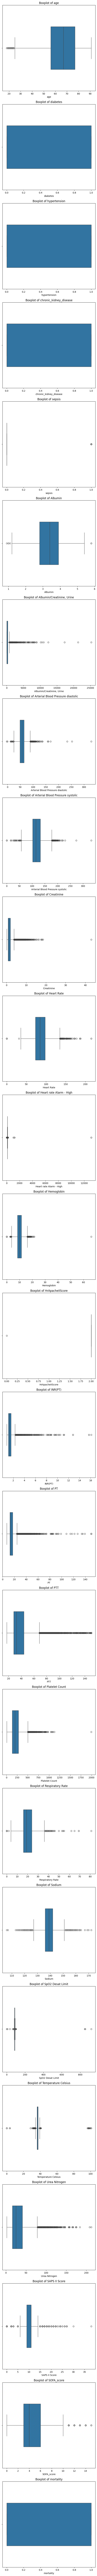

In [ ]:
columns = [
    'age', 'diabetes', 'hypertension', 'chronic_kidney_disease',
    'sepsis', 'Albumin', 'Albumin/Creatinine, Urine',
    'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic','Creatinine','Heart Rate','Heart rate Alarm - High',
    'Hemoglobin', 'HrApacheIIScore', 'INR(PT)', 'PT','PTT','Platelet Count', 'Respiratory Rate',
    'Sodium', 'SpO2 Desat Limit', 'Temperature Celsius', 'Urea Nitrogen','SAPS II Score','SOFA_score', 'mortality'
]

plt.figure(figsize=(6, 6 * len(columns)))
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.boxplot(data=train_data, x=column, width=0.5)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already read the CSV file into train_data
# train_data = pd.read_csv(path + 'SA_AKI.csv')
columns2 = [
    'age', 'diabetes', 'hypertension', 'chronic_kidney_disease',
    'sepsis', 'Albumin', 'Albumin/Creatinine, Urine',
    'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic','Creatinine','Heart Rate','Heart rate Alarm - High',
    'Hemoglobin', 'HrApacheIIScore', 'INR(PT)', 'PT','PTT','Platelet Count', 'Respiratory Rate',
    'Sodium', 'SpO2 Desat Limit', 'Temperature Celsius', 'Urea Nitrogen','SAPS II Score','SOFA_score', 'mortality'
]
def remove_outliers_iqr(df):
    df_cleaned = df.dropna()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for col in df.columns:
        if col not in ['sepsis', 'SOFA','gender']:
            df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), np.nan)

    return df


#train_data = train_data.iloc[:, 2:].copy()
# Apply remove_outliers_iqr to the selected columns
train_data_cleaned = remove_outliers_iqr(train_data[columns2].copy())

# Assuming you have original demographic columns in a DataFrame named df_demographic
# Merge back the cleaned results with the original demographic columns
df_merged_cleaned = pd.concat([train_data.iloc[:, :2], train_data_cleaned], axis=1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   subject_id                           10760 non-null  int64  
 1   gender                               10760 non-null  int64  
 2   age                                  10760 non-null  int64  
 3   diabetes                             10760 non-null  int64  
 4   hypertension                         10760 non-null  int64  
 5   chronic_kidney_disease               10760 non-null  int64  
 6   sepsis                               10760 non-null  int64  
 7   cardiovascular_disease               10760 non-null  int64  
 8   Albumin                              10061 non-null  float64
 9   Albumin/Creatinine, Urine            1595 non-null   float64
 10  Anion Gap                            10758 non-null  float64
 11  Arterial Blood Pressure dias

In [ ]:
df_merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subject_id                         10760 non-null  int64  
 1   gender                             10760 non-null  int64  
 2   age                                10643 non-null  float64
 3   diabetes                           10760 non-null  int64  
 4   hypertension                       10760 non-null  int64  
 5   chronic_kidney_disease             10760 non-null  int64  
 6   sepsis                             10760 non-null  int64  
 7   Albumin                            10055 non-null  float64
 8   Albumin/Creatinine, Urine          1344 non-null   float64
 9   Arterial Blood Pressure diastolic  6849 non-null   float64
 10  Arterial Blood Pressure systolic   6900 non-null   float64
 11  Creatinine                         9745 non-null   flo

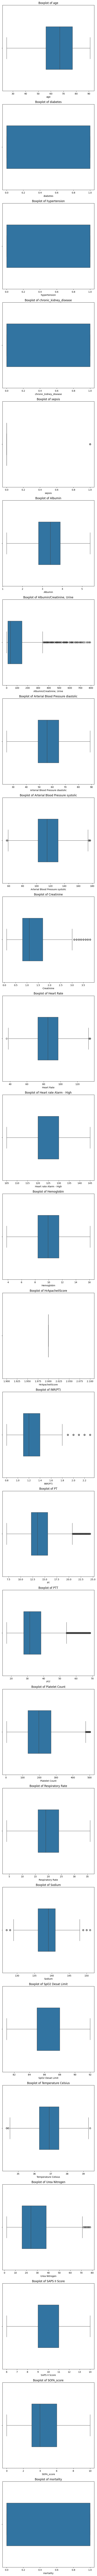

In [ ]:
plt.figure(figsize=(6, 6 * len(columns)))
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.boxplot(data=df_merged_cleaned, x=column, width=0.5)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
print("Missing values in Data:")
print(df_merged_cleaned.isnull().sum())

Missing values in Data:
subject_id                               0
gender                                   0
age                                    117
diabetes                                 0
hypertension                             0
chronic_kidney_disease                   0
sepsis                                   0
Albumin                                705
Albumin/Creatinine, Urine             9416
Arterial Blood Pressure diastolic     3911
Arterial Blood Pressure systolic      3860
Creatinine                            1015
Heart Rate                             128
Heart rate Alarm - High                701
Hemoglobin                            3986
HrApacheIIScore                      10754
INR(PT)                               1126
PT                                    1207
PTT                                   1271
Platelet Count                         435
Respiratory Rate                       130
Sodium                                 304
SpO2 Desat Limit              

In [ ]:
if 'HrApacheIIScore' in df_merged_cleaned.columns:
    df_merged_cleaned.drop(columns=['HrApacheIIScore','Albumin/Creatinine, Urine'], inplace=True)

In [ ]:
df_merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subject_id                         10760 non-null  int64   
 1   gender                             10760 non-null  category
 2   age                                10643 non-null  float64 
 3   diabetes                           10760 non-null  category
 4   hypertension                       10760 non-null  category
 5   chronic_kidney_disease             10760 non-null  category
 6   sepsis                             10760 non-null  category
 7   Albumin                            10055 non-null  float64 
 8   Arterial Blood Pressure diastolic  6849 non-null   float64 
 9   Arterial Blood Pressure systolic   6900 non-null   float64 
 10  Creatinine                         9745 non-null   float64 
 11  Heart Rate                         10632 

In [ ]:
# Assuming df is your DataFrame
'''
numerical_cols = df_merged_cleaned.select_dtypes(include=['float64']).columns
categorical_cols = df_merged_cleaned.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns with the median
df_merged_cleaned[numerical_cols] = df_merged_cleaned[numerical_cols].fillna(df_merged_cleaned[numerical_cols].median())

# Fill missing values for categorical columns with the mode
df_merged_cleaned[categorical_cols] = df_merged_cleaned[categorical_cols].fillna(df_merged_cleaned[categorical_cols].mode().iloc[0])
'''

MICEForest

In [ ]:
!pip install --upgrade miceforest

In [ ]:
import pandas as pd
import miceforest as mf

# Assuming df_merged_cleaned is your DataFrame
numerical_cols = ['age','Albumin','Arterial Blood Pressure diastolic','Arterial Blood Pressure systolic','Creatinine',
                  'Heart Rate','Heart rate Alarm - High','Hemoglobin','INR(PT)','PT','PTT','Platelet Count','Respiratory Rate',
                  'Sodium','SpO2 Desat Limit','Temperature Celsius','Urea Nitrogen','SAPS II Score','SOFA_score']
categorical_cols = ['gender','diabetes','hypertension','chronic_kidney_disease','sepsis','mortality']
#numerical_cols = df_merged_cleaned.select_dtypes(include=['float64']).columns
#categorical_cols = df_merged_cleaned.select_dtypes(include=['object']).columns

# Convert object columns to categorical

for col in categorical_cols:
    df_merged_cleaned[col] = df_merged_cleaned[col].astype('category')

# Access the imputed data (one imputed dataset)
df_merged_cleaned2 = df_merged_cleaned.copy()
impute = mf.ImputationKernel(df_merged_cleaned2, datasets=5, save_all_iterations=True, random_state=42)

# Specify numerical columns for imputation
impute.mice(5)




In [ ]:
imputed_data = impute.complete_data(0)
imputed_data1 = impute.complete_data(1)
imputed_data2 = impute.complete_data(2)
imputed_data3 = impute.complete_data(3)
imputed_data4 = impute.complete_data(4)

# Ensure all datasets have the same dimensions
assert imputed_data.shape == imputed_data1.shape == imputed_data2.shape == imputed_data3.shape == imputed_data4.shape, "Datasets must have the same dimensions"




In [ ]:
numerical_cols = ['age', 'Albumin','Arterial Blood Pressure diastolic','Arterial Blood Pressure systolic','Creatinine',
                  'Heart Rate','Heart rate Alarm - High','Hemoglobin','INR(PT)','PT','PTT','Platelet Count','Respiratory Rate','Sodium',
                  'SpO2 Desat Limit','Temperature Celsius','Urea Nitrogen','SAPS II Score','SOFA_score']
categorical_cols = ['gender','diabetes','hypertension','chronic_kidney_disease','sepsis','mortality']

# Create an empty DataFrame for the final dataset
final_dataset = pd.DataFrame(index=imputed_data.index, columns=numerical_cols)

# Iterate over each row and calculate the mean for numerical columns
for row_index in range(imputed_data.shape[0]):
    for col_name in numerical_cols:
        mean_value = (imputed_data.loc[row_index, col_name] + imputed_data1.loc[row_index, col_name] + imputed_data2.loc[row_index, col_name]+ imputed_data3.loc[row_index, col_name] + imputed_data4.loc[row_index, col_name]) / 5
        final_dataset.loc[row_index, col_name] = mean_value

# Save or display the final dataset
final_dataset.to_csv('final_dataset.csv', index=False)  # Save as CSV
print(final_dataset)

        age Albumin Arterial Blood Pressure diastolic  \
0      86.0     3.8                              49.8   
1      47.0     2.6                              75.0   
2      82.0     4.4                              38.0   
3      51.0     2.9                              61.6   
4      70.0     3.7                              51.0   
...     ...     ...                               ...   
10755  63.0     4.0                              58.0   
10756  52.0     3.5                              56.0   
10757  82.0     3.6                              43.8   
10758  66.0     3.8                              51.0   
10759  42.0     2.4                              58.8   

      Arterial Blood Pressure systolic Creatinine Heart Rate  \
0                                126.4        2.6       86.0   
1                                110.0       2.02      114.0   
2                                106.0        1.4       70.0   
3                                139.2        2.8       74.

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                10760 non-null  object
 1   Albumin                            10760 non-null  object
 2   Arterial Blood Pressure diastolic  10760 non-null  object
 3   Arterial Blood Pressure systolic   10760 non-null  object
 4   Creatinine                         10760 non-null  object
 5   Heart Rate                         10760 non-null  object
 6   Heart rate Alarm - High            10760 non-null  object
 7   Hemoglobin                         10760 non-null  object
 8   INR(PT)                            10760 non-null  object
 9   PT                                 10760 non-null  object
 10  PTT                                10760 non-null  object
 11  Platelet Count                     10760 non-null  object
 12  Resp

In [ ]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subject_id                         10760 non-null  int64   
 1   gender                             10760 non-null  category
 2   age                                10760 non-null  float64 
 3   diabetes                           10760 non-null  category
 4   hypertension                       10760 non-null  category
 5   chronic_kidney_disease             10760 non-null  category
 6   sepsis                             10760 non-null  category
 7   Albumin                            10760 non-null  float64 
 8   Arterial Blood Pressure diastolic  10760 non-null  float64 
 9   Arterial Blood Pressure systolic   10760 non-null  float64 
 10  Creatinine                         10760 non-null  float64 
 11  Heart Rate                         10760 

In [ ]:
final_dataset_cat = pd.DataFrame(index=imputed_data1.index, columns=categorical_cols)

# Iterate over each row
for row_index in range(imputed_data1.shape[0]):
    # Iterate over each categorical column
    for col_name in categorical_cols:
        # Concatenate values from all DataFrames for the current column and row
        values = pd.Series([
            imputed_data1.loc[row_index, col_name],
            imputed_data2.loc[row_index, col_name],
            imputed_data3.loc[row_index, col_name],
            imputed_data4.loc[row_index, col_name],
            imputed_data.loc[row_index, col_name]
        ])
        # Calculate the mode
        mode_value = values.mode()[0]
        # Assign mode value to the final dataset
        final_dataset_cat.loc[row_index, col_name] = mode_value

# Save or display the final dataset
final_dataset_cat.to_csv('final_dataset.csv', index=False)  # Save as CSV
print(final_dataset_cat)

      gender diabetes hypertension chronic_kidney_disease sepsis mortality
0          1        0            1                      1      0         1
1          1        0            1                      1      0         0
2          1        0            1                      1      0         1
3          1        0            0                      1      0         0
4          1        0            1                      0      0         0
...      ...      ...          ...                    ...    ...       ...
10755      0        0            0                      1      0         0
10756      0        0            0                      0      0         0
10757      0        0            0                      1      0         0
10758      0        0            0                      0      0         0
10759      1        0            0                      0      0         1

[10760 rows x 6 columns]


In [ ]:
final_dataset_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  10760 non-null  object
 1   diabetes                10760 non-null  object
 2   hypertension            10760 non-null  object
 3   chronic_kidney_disease  10760 non-null  object
 4   sepsis                  10760 non-null  object
 5   mortality               10760 non-null  object
dtypes: object(6)
memory usage: 504.5+ KB


In [ ]:
final_dataset_combined1 = pd.concat([final_dataset, final_dataset_cat], axis=1)


In [ ]:
final_dataset_combined1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                10760 non-null  object
 1   Albumin                            10760 non-null  object
 2   Arterial Blood Pressure diastolic  10760 non-null  object
 3   Arterial Blood Pressure systolic   10760 non-null  object
 4   Creatinine                         10760 non-null  object
 5   Heart Rate                         10760 non-null  object
 6   Heart rate Alarm - High            10760 non-null  object
 7   Hemoglobin                         10760 non-null  object
 8   INR(PT)                            10760 non-null  object
 9   PT                                 10760 non-null  object
 10  PTT                                10760 non-null  object
 11  Platelet Count                     10760 non-null  object
 12  Resp

In [ ]:
# Convert columns to numerical type
final_dataset_combined1[numerical_cols] = final_dataset_combined1[numerical_cols].astype(float)

# Save or display the modified dataset
final_dataset_combined1.to_csv('final_dataset_combined_numerical.csv', index=False)  # Save as CSV


        age Albumin Arterial Blood Pressure diastolic  \
0      86.0     3.8                              49.8   
1      47.0     2.6                              75.0   
2      82.0     4.4                              38.0   
3      51.0     2.9                              61.6   
4      70.0     3.7                              51.0   
...     ...     ...                               ...   
10755  63.0     4.0                              58.0   
10756  52.0     3.5                              56.0   
10757  82.0     3.6                              43.8   
10758  66.0     3.8                              51.0   
10759  42.0     2.4                              58.8   

      Arterial Blood Pressure systolic Creatinine Heart Rate  \
0                                126.4        2.6       86.0   
1                                110.0       2.02      114.0   
2                                106.0        1.4       70.0   
3                                139.2        2.8       74.

In [ ]:
final_dataset_combined1['age'] = final_dataset_combined1['age'].astype(float)
final_dataset_combined1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                10760 non-null  float64
 1   Albumin                            10760 non-null  float64
 2   Arterial Blood Pressure diastolic  10760 non-null  float64
 3   Arterial Blood Pressure systolic   10760 non-null  float64
 4   Creatinine                         10760 non-null  float64
 5   Heart Rate                         10760 non-null  float64
 6   Heart rate Alarm - High            10760 non-null  float64
 7   Hemoglobin                         10760 non-null  float64
 8   INR(PT)                            10760 non-null  float64
 9   PT                                 10760 non-null  float64
 10  PTT                                10760 non-null  float64
 11  Platelet Count                     10760 non-null  flo

In [ ]:
# Convert columns to integer type
final_dataset_combined1[['gender', 'diabetes', 'hypertension', 'chronic_kidney_disease', 'sepsis', 'mortality']] = final_dataset_combined1[['gender', 'diabetes', 'hypertension', 'chronic_kidney_disease', 'sepsis', 'mortality']].astype(int)


In [ ]:
df_merged_final = final_dataset_combined1

In [ ]:
print("Missing values in Data after imputation:")
print(df_merged_final.isnull().sum())


Missing values in Data after imputation:
age                                  0
Albumin                              0
Arterial Blood Pressure diastolic    0
Arterial Blood Pressure systolic     0
Creatinine                           0
Heart Rate                           0
Heart rate Alarm - High              0
Hemoglobin                           0
INR(PT)                              0
PT                                   0
PTT                                  0
Platelet Count                       0
Respiratory Rate                     0
Sodium                               0
SpO2 Desat Limit                     0
Temperature Celsius                  0
Urea Nitrogen                        0
SAPS II Score                        0
SOFA_score                           0
gender                               0
diabetes                             0
hypertension                         0
chronic_kidney_disease               0
sepsis                               0
mortality              

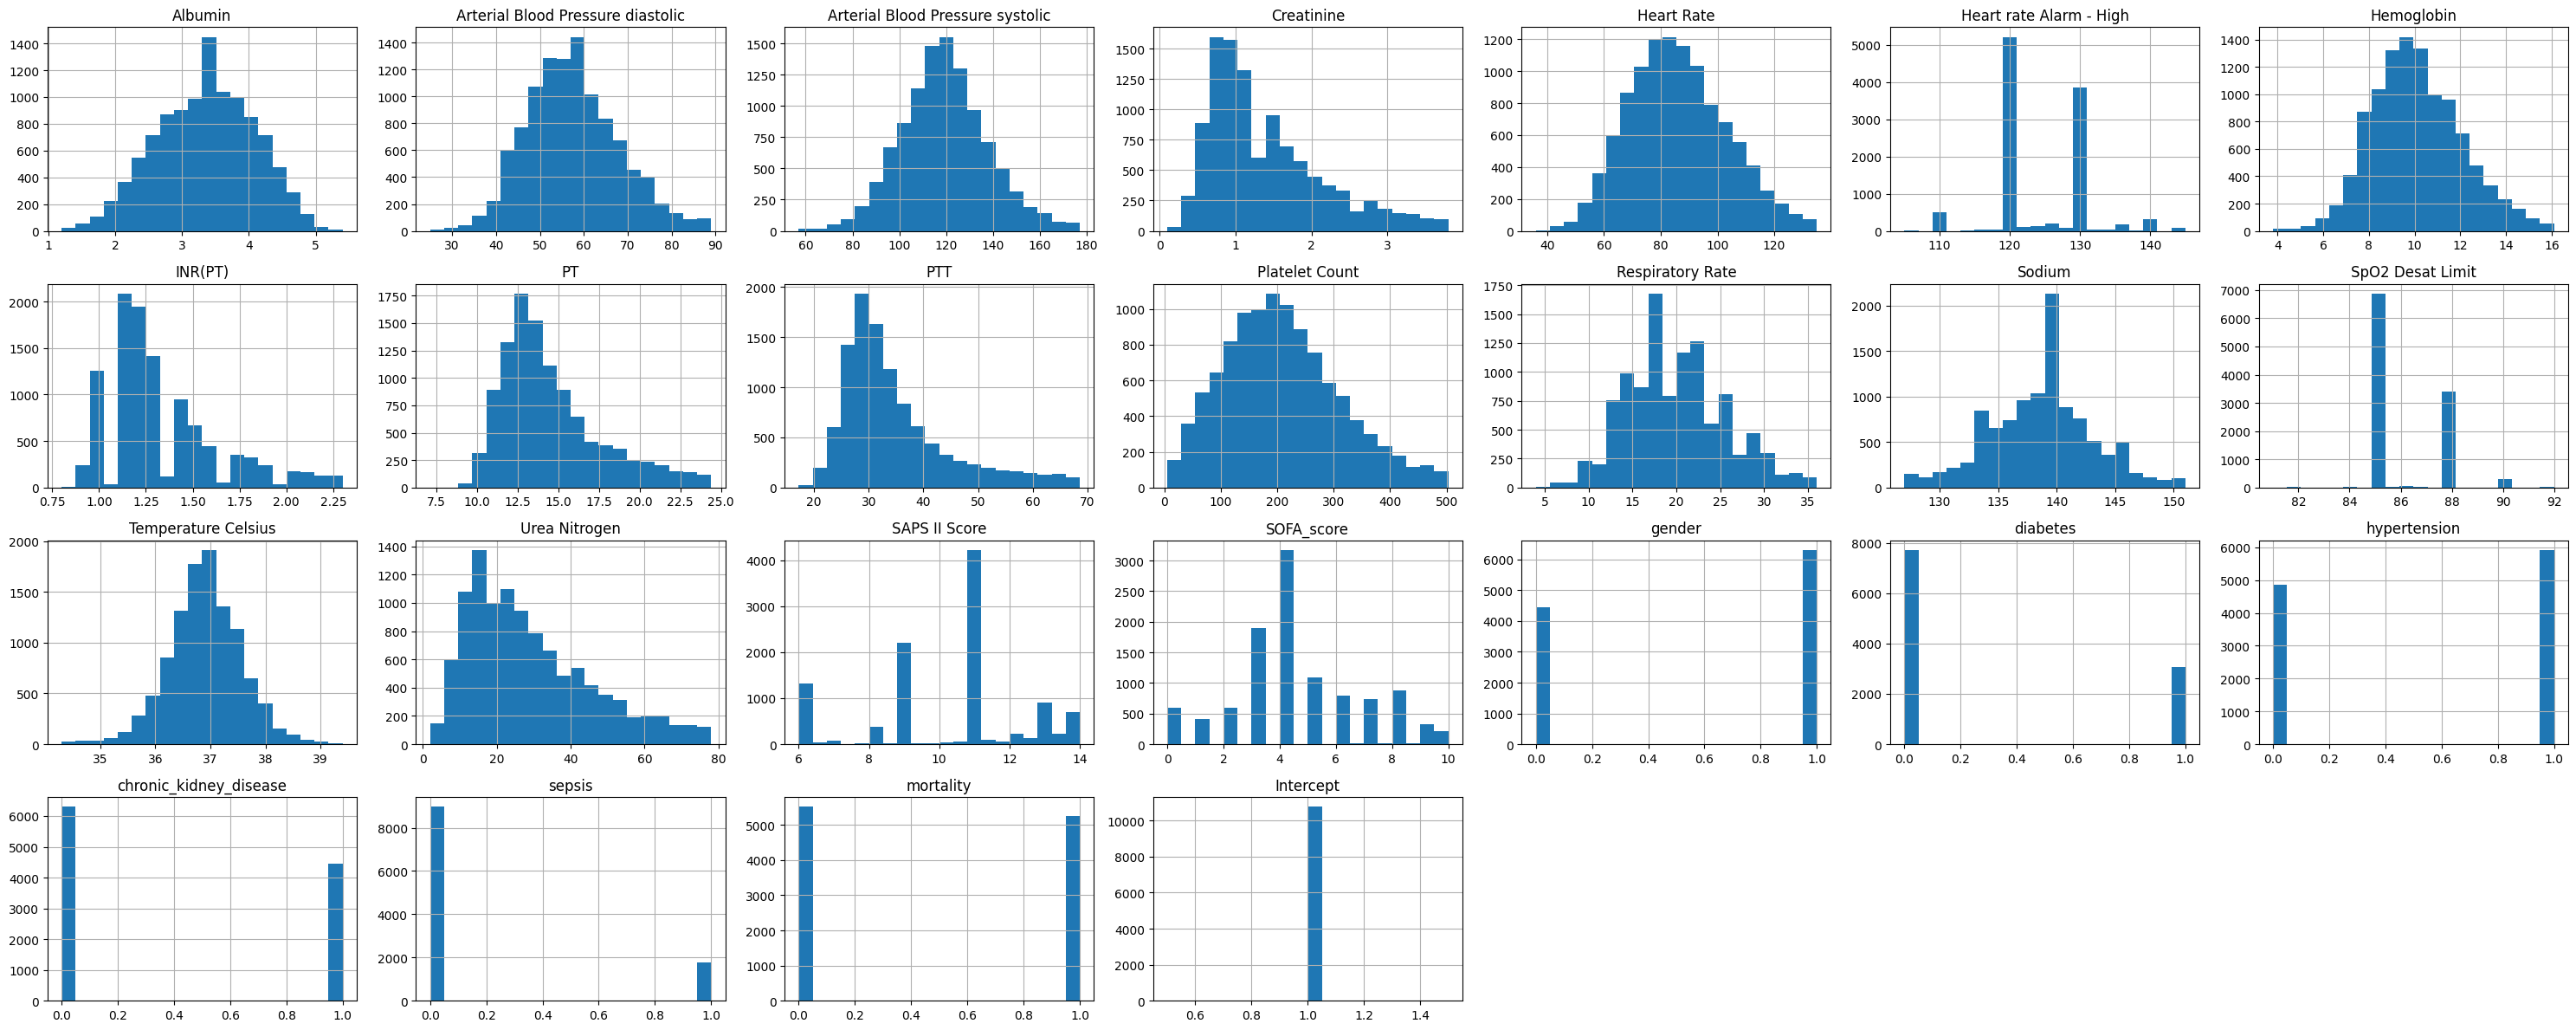

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after imputation
num_rows=4
num_cols=7
total_subplots = num_rows * num_cols
df_merged_cleaned1 = df_merged_final.iloc[:,1:]
num_columns = df_merged_cleaned1.shape[1]
# Create a 5x4 subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 12))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Loop through the columns and plot histograms
for i in range(total_subplots):
    # Check if there are more columns to plot
    if i < num_columns:
        # Select the i-th column
        column_name = df_merged_cleaned1.columns[i]

        # Plot histogram on the current subplot
        df_merged_cleaned1[column_name].hist(ax=axes[i], bins=20)

        # Set subplot title
        axes[i].set_title(column_name)

    # Hide empty subplots if there are fewer columns than total subplots
    else:
        axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

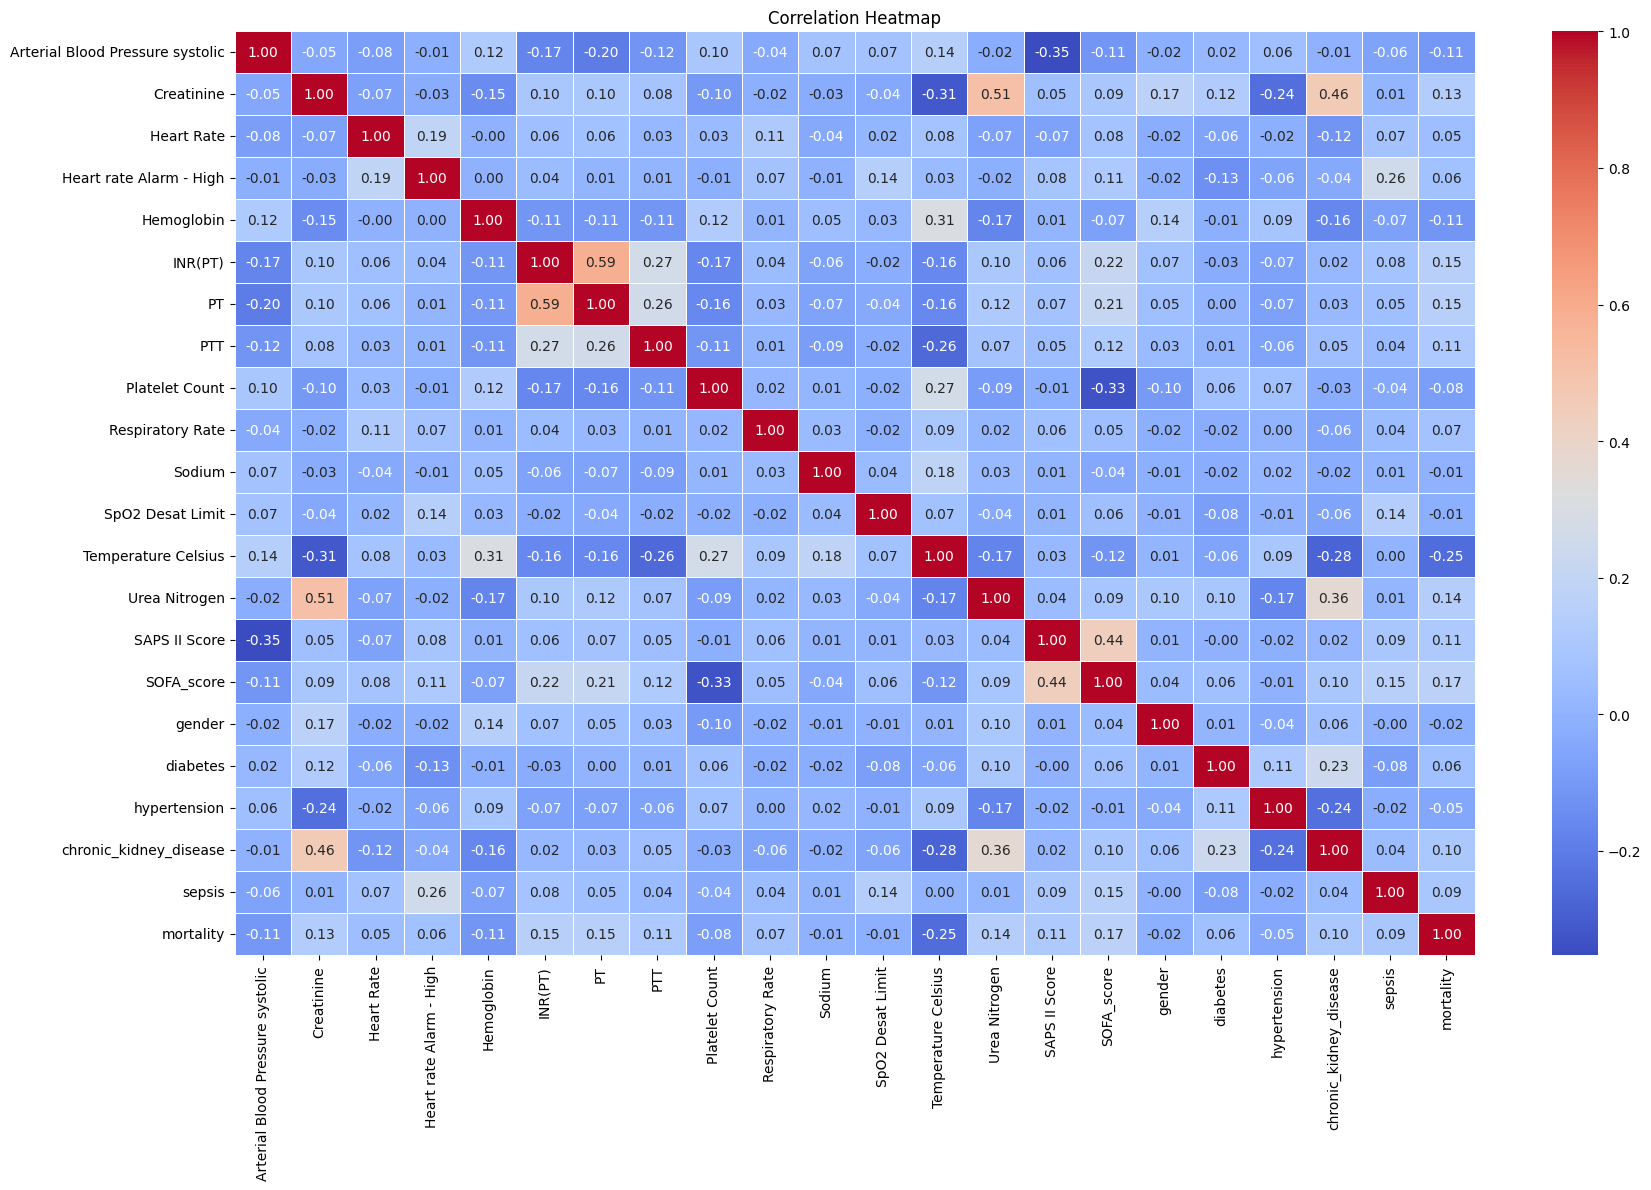

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after imputation
correlation_matrix = df_merged_final.iloc[:, 3:-1].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame after imputation
# Select only numerical columns for VIF calculation
df_merged_final["Intercept"] = 1
numerical_cols = df_merged_cleaned.iloc[:, 3:].select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame with only the numerical columns
df_numerical = df_merged_final[numerical_cols]

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

# Display the VIF data
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

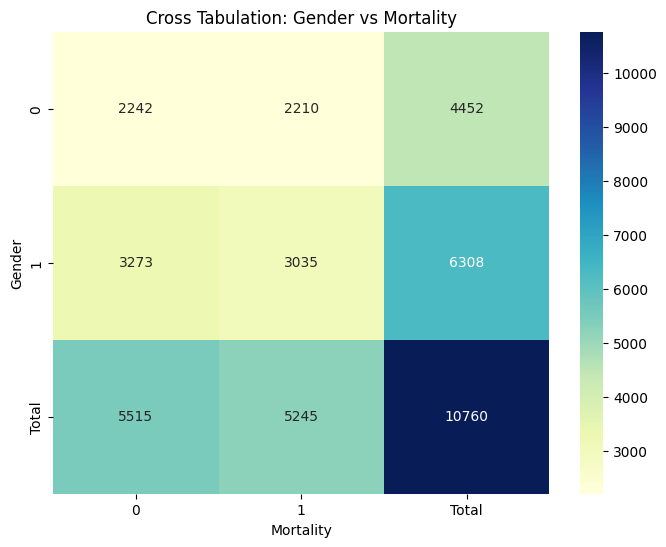

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged_cleaned is your DataFrame after imputation and cleaning

# Create cross-tabulation
cross_tab = pd.crosstab(df_merged_final['gender'], df_merged_final['mortality'], margins=True, margins_name="Total")

# Plot the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('Cross Tabulation: Gender vs Mortality')
plt.xlabel('Mortality')
plt.ylabel('Gender')
plt.show()


#Model

In [ ]:
df_merged_final = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target variable
X = df_merged_final.drop(['mortality'], axis=1)
y = df_merged_final['mortality']
y = pd.DataFrame(y)
print(f_merged_final['mortality'].value_counts())

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for feature in X_train.columns:
    print(feature, "train", X_train[feature].mean())
    print(feature, "train", X_train[feature].std())
    print(feature, "test", X_test[feature].mean())
    print(feature, "test", X_test[feature].std())

In [ ]:
print(y_train['mortality'].value_counts())
print(y_test['mortality'].value_counts())
print(len(X_train))
print(len(X_test))

In [ ]:
print(X_train['gender'].value_counts())
print(3556/8608)
print(X_test['gender'].value_counts())
print(896/2152)

In [ ]:
print("diabetes", "train", X_train['diabetes'].value_counts())
print(2455/8608)
print("diabetes", "test", X_test['diabetes'].value_counts())
print(594/2152)
print()
print("hypertension", "train", X_train['hypertension'].value_counts())
print(4706/8608)
print("hypertension", "test", X_test['hypertension'].value_counts())
print(1208/2152)
print()
print("chronic_kidney_disease", "train", X_train['chronic_kidney_disease'].value_counts())
print(3590/8608)
print("chronic_kidney_disease", "test", X_test['chronic_kidney_disease'].value_counts())
print(869/2152)

In [ ]:
print(X_train['age'].mean())
print(X_train['age'].std())


In [ ]:
print(X_test['age'].mean())
print(X_test['age'].std())

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame with features and target variable
# 'target_variable' is the name of the target variable column

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(columns=['Feature', 'P-value'])

# Loop through each feature column
for feature in X_train.columns:
        # Perform t-test between the feature and target variable
        t_stat, p_value = ttest_ind(X_train[y_train['mortality'] == 0][feature],
                                     X_train[y_train['mortality'] == 1][feature],
                                     equal_var=False)  # Assuming unequal variance

        # Store the p-value in the DataFrame
        p_values_df = p_values_df._append({'Feature': feature, 'P-value': p_value}, ignore_index=True)

# Display the DataFrame with p-values
print(p_values_df)

In [ ]:
from scipy import stats

# Assuming X_train is your train dataset with features as columns
# Assuming y_train is your corresponding target variable

# Iterate through each feature in X_train
for feature in X_train.columns:
    # Separate the data for the current feature from train dataset for each class of y_train
    feature_data = X_train[feature]
    for class_label in y_train.unique():
        # Filter the data for the current class label
        class_data = feature_data[y_train == class_label]

        # Perform t-test against the rest of the data
        t_statistic, p_value = stats.ttest_1samp(class_data, feature_data.mean())

        # Print the results for each feature and class
        print("Feature:", feature)
        print("Class Label:", class_label)
        print("T-statistic:", t_statistic)
        print("P-value:", p_value)
        print()


In [ ]:
print(len(X_train))
print(len(y_train))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_merged_cleaned is your DataFrame after imputation and cleaning

# Select features and target variable
X = df_merged_final.drop(['mortality'], axis=1)
y = df_merged_final['mortality']

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Separate numerical columns for scaling
numerical_cols = ['age', 'Albumin','Arterial Blood Pressure diastolic','Arterial Blood Pressure systolic','Creatinine',
                  'Heart Rate','Heart rate Alarm - High','Hemoglobin','INR(PT)','PT','PTT','Platelet Count','Respiratory Rate','Sodium',
                  'SpO2 Desat Limit','Temperature Celsius','Urea Nitrogen','SAPS II Score','SOFA_score']



In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
X_train.drop(['Intercept'], axis=1, inplace=True)
X_test.drop(['Intercept'], axis=1, inplace=True)

In [ ]:
X_train

,age,Albumin,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Creatinine,Heart Rate,Heart rate Alarm - High,Hemoglobin,INR(PT),PT,...,SpO2 Desat Limit,Temperature Celsius,Urea Nitrogen,SAPS II Score,SOFA_score,gender,diabetes,hypertension,chronic_kidney_disease,sepsis
7037,0.416685,-0.757703,1.204569,-1.601777,-0.916397,-0.644315,-0.674540,-0.158114,1.881927,2.006187,...,-0.701214,0.597162,-0.235800,1.316079,1.107736,0,0,1,0,0
625,-0.864554,0.880183,-0.229685,-1.120855,-0.916397,-0.009467,-0.674540,-0.518927,0.573821,-0.078804,...,1.217957,0.821629,-0.176017,1.405985,0.673250,0,0,1,0,0
3047,-1.134289,0.334221,2.160738,0.321911,-0.785078,0.856235,1.620919,-0.415838,-1.388338,0.498578,...,-0.701214,1.375316,-1.311895,0.327111,-0.195720,1,1,1,0,0
9820,-0.325085,0.607202,-1.281471,-0.586497,-0.653760,0.856235,-0.674540,2.161404,0.246794,-0.213527,...,-0.701214,0.537304,-0.594498,0.327111,0.238765,1,0,1,0,0
8693,0.416685,1.426144,-0.822510,-0.233821,-0.391124,-0.644315,0.855766,-0.725107,-0.734285,-0.816570,...,1.217957,-0.809502,-0.953196,-1.920543,-1.064691,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.012083,-0.894193,-1.568322,1.070012,-0.916397,-1.048309,0.855766,-0.673562,0.246794,0.594808,...,1.217957,-0.121135,1.617474,0.327111,1.542221,1,0,1,0,1
5191,1.158455,1.835616,-1.377088,1.337191,0.396786,-1.510017,-2.204845,-1.292100,-0.407259,-0.014651,...,-0.701214,-0.210922,0.780512,-1.021482,-0.630206,0,0,1,0,0
5390,0.416685,-0.211741,-0.516536,0.001296,-1.047715,1.375656,-0.674540,2.109859,-0.080232,-0.367495,...,-0.701214,0.597162,-0.116234,0.776642,-0.195720,1,0,0,0,0
860,0.214384,0.334221,0.076289,-0.543749,1.972606,1.144802,0.855766,0.532587,-0.211043,-0.014651,...,-0.701214,-0.151064,0.959861,0.327111,1.976707,1,0,1,1,1


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

pipeline = LogisticRegression(max_iter=10000)
pipeline.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_logistic = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for Logistic Regression: {aucroc_logistic:.4f}")

Accuracy: 0.6575
Confusion Matrix:
[[731 349]
 [388 684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1080
           1       0.66      0.64      0.65      1072

    accuracy                           0.66      2152
   macro avg       0.66      0.66      0.66      2152
weighted avg       0.66      0.66      0.66      2152

AUC-ROC for Logistic Regression: 0.7129


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [
{
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
              ]
grid_search = GridSearchCV(
    estimator= pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_lr = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_lr*100))
print("Best Parameters : ",best_parameters )

Best AUC: 74.13
Best Parameters :  {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Get the best model from grid search
best_model_lr = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_lr.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_logistic = roc_auc_score(y_test, best_model_lr.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for Logistic Regression: {aucroc_logistic:.4f}")
print(f"AUC-ROC for Logistic Regression: {best_auc_lr:.4f}")

Accuracy: 0.6594
Confusion Matrix:
[[733 347]
 [386 686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1080
           1       0.66      0.64      0.65      1072

    accuracy                           0.66      2152
   macro avg       0.66      0.66      0.66      2152
weighted avg       0.66      0.66      0.66      2152

AUC-ROC for Logistic Regression: 0.7413


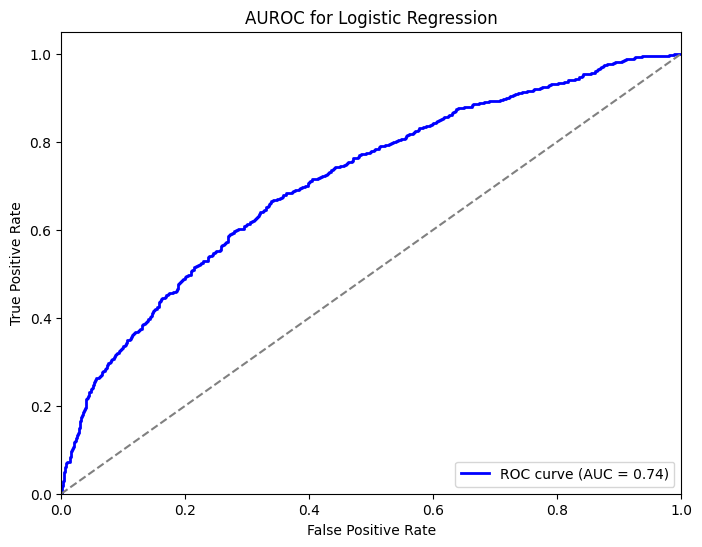

In [ ]:
y_probs = best_model_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

##SVM

In [ ]:
from sklearn.svm import SVC
kernel_svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
kernel_svc_classifier.fit(X_train, y_train)


# Predictions using Random Forest model
svc_y_pred = kernel_svc_classifier.predict(X_test)

# Evaluate Random Forest model
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_conf_matrix = confusion_matrix(y_test, svc_y_pred)
svc_class_report = classification_report(y_test, svc_y_pred)

print("\nKernal SVC Classifier:")
print(f"Accuracy: {svc_accuracy:.4f}")
print("Confusion Matrix:")
print(svc_conf_matrix)
print("\nClassification Report:")
print(svc_class_report)

aucroc_svc = roc_auc_score(y_test, kernel_svc_classifier.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for SVC: {aucroc_svc:.4f}")


Kernal SVC Classifier:
Accuracy: 0.6784
Confusion Matrix:
[[784 296]
 [396 676]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1080
           1       0.70      0.63      0.66      1072

    accuracy                           0.68      2152
   macro avg       0.68      0.68      0.68      2152
weighted avg       0.68      0.68      0.68      2152

AUC-ROC for SVC: 0.7405


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [  {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'gamma': [0.1, 1, 'scale']  # Only for 'rbf' and 'sigmoid' kernels
}
              ]
grid_search = GridSearchCV(
    estimator= kernel_svc_classifier,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f}".format(best_accuracy*100))
print("Best Parameters : ",best_parameters )

In [ ]:
# Get the best model from grid search
best_model_svm = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_svm.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_svm = roc_auc_score(y_test, best_model_svm.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for SVM: {aucroc_svm:.4f}")

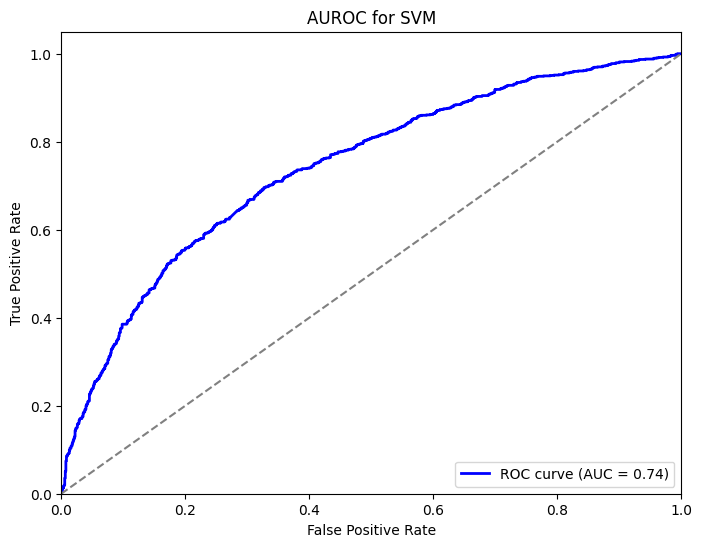

In [ ]:
y_probs = kernel_svc_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % aucroc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for SVM')
plt.legend(loc='lower right')
plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors= 7)
knn_classifier.fit(X_train, y_train)

# Predictions using Random Forest model
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate Random Forest model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

print("\nKNN Classifier:")
print(f"Accuracy: {knn_accuracy:.4f}")
print("Confusion Matrix:")
print(knn_conf_matrix)
print("\nClassification Report:")
print(knn_class_report)

aucroc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for KNN: {aucroc_knn:.4f}")


KNN Classifier:
Accuracy: 0.6273
Confusion Matrix:
[[731 349]
 [453 619]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1080
           1       0.64      0.58      0.61      1072

    accuracy                           0.63      2152
   macro avg       0.63      0.63      0.63      2152
weighted avg       0.63      0.63      0.63      2152

AUC-ROC for KNN: 0.6696


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [  {
    'n_neighbors': [3, 5, 7, 9],  # Values of k to try
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}
              ]
grid_search = GridSearchCV(
    estimator= knn_classifier,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_knn = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f}".format(best_auc_knn*100))
print("Best Parameters : ",best_parameters )

Best Accuracy: 69.81
Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
# Get the best model from grid search
best_model_knn = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_knn.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_knn = roc_auc_score(y_test, best_model_knn.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for KNN: {aucroc_knn:.4f}")
print(f"AUC-ROC for KNN: {best_auc_knn:.4f}")

Accuracy: 0.6371
Confusion Matrix:
[[748 332]
 [449 623]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66      1080
           1       0.65      0.58      0.61      1072

    accuracy                           0.64      2152
   macro avg       0.64      0.64      0.64      2152
weighted avg       0.64      0.64      0.64      2152

AUC-ROC for KNN: 0.6981


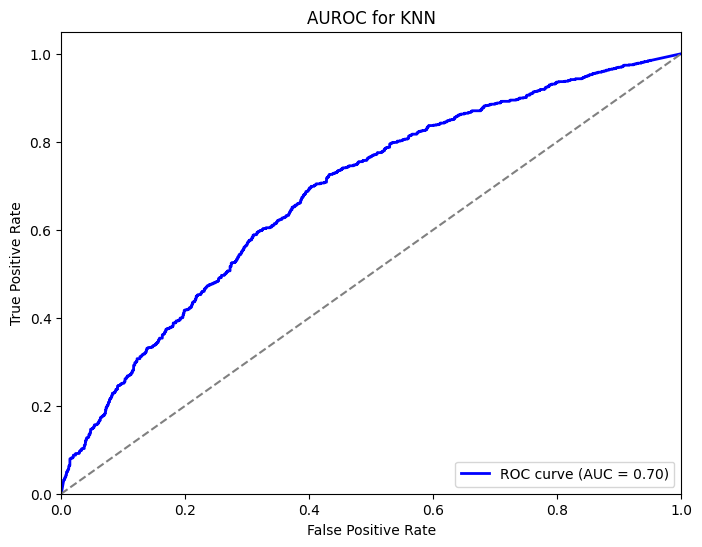

In [ ]:
y_probs = best_model_knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for KNN')
plt.legend(loc='lower right')
plt.show()

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier( random_state = 0)
dt_classifier.fit(X_train, y_train)

dt_y_pred = dt_classifier.predict(X_test)

# Evaluate Random Forest model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.4f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\nClassification Report:")
print(dt_class_report)

aucroc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for Decision Tree: {aucroc_dt:.4f}")


Decision Tree Classifier:
Accuracy: 0.6064
Confusion Matrix:
[[635 445]
 [402 670]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1080
           1       0.60      0.62      0.61      1072

    accuracy                           0.61      2152
   macro avg       0.61      0.61      0.61      2152
weighted avg       0.61      0.61      0.61      2152

AUC-ROC for Decision Tree: 0.6065


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [ {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}
              ]
grid_search = GridSearchCV(
    estimator= dt_classifier,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_dt = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_dt*100))
print("Best Parameters : ",best_parameters )

Best AUC: 63.35
Best Parameters :  {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Get the best model from grid search
best_model_dt = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_dt.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_dt = roc_auc_score(y_test, best_model_dt.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for Decision Tree: {aucroc_dt:.4f}")

print(f"AUC-ROC for Decision Tree: {best_auc_dt:.4f}")

Accuracy: 0.5855
Confusion Matrix:
[[666 414]
 [478 594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1080
           1       0.59      0.55      0.57      1072

    accuracy                           0.59      2152
   macro avg       0.59      0.59      0.59      2152
weighted avg       0.59      0.59      0.59      2152

AUC-ROC for Decision Tree: 0.6335


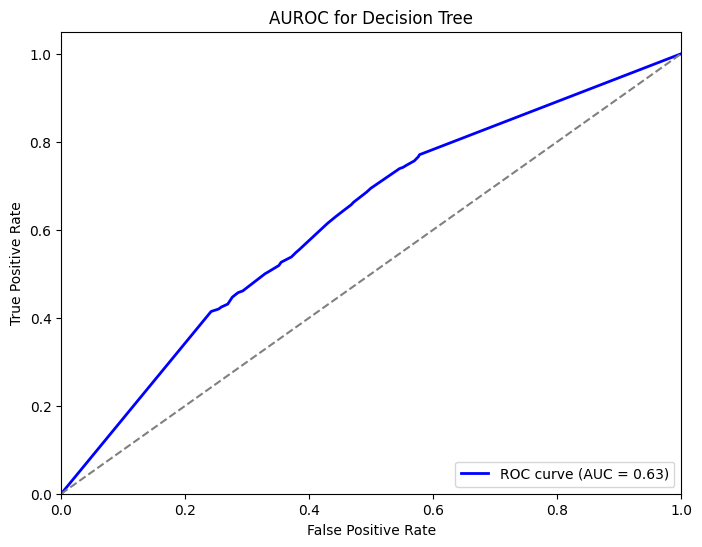

In [ ]:
y_probs = best_model_dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Decision Tree')
plt.legend(loc='lower right')
plt.show()

##Random Forest

In [ ]:
# Random Forest Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

rf_pipeline =  RandomForestClassifier(random_state=42)  # You can adjust parameters as needed

rf_pipeline.fit(X_train, y_train)

# Predictions using Random Forest model
rf_y_pred = rf_pipeline.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_class_report)

aucroc_rf = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for Random Forest: {aucroc_rf:.4f}")


Random Forest Classifier:
Accuracy: 0.6719
Confusion Matrix:
[[783 297]
 [409 663]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1080
           1       0.69      0.62      0.65      1072

    accuracy                           0.67      2152
   macro avg       0.67      0.67      0.67      2152
weighted avg       0.67      0.67      0.67      2152

AUC-ROC for Random Forest: 0.7385


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [
{
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
              ]
grid_search = GridSearchCV(
    estimator= rf_pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_rf = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_rf*100))
print("Best Parameters : ",best_parameters )

Best AUC: 74.22
Best Parameters :  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
# Get the best model from grid search
best_model_rf = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_rf.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_rf = roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for Random Forest: {aucroc_rf:.4f}")

print(f"AUC-ROC for Random Forest: {best_auc_rf:.4f}")

Accuracy: 0.6631
Confusion Matrix:
[[778 302]
 [423 649]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1080
           1       0.68      0.61      0.64      1072

    accuracy                           0.66      2152
   macro avg       0.67      0.66      0.66      2152
weighted avg       0.67      0.66      0.66      2152

AUC-ROC for Random Forest: 0.7422


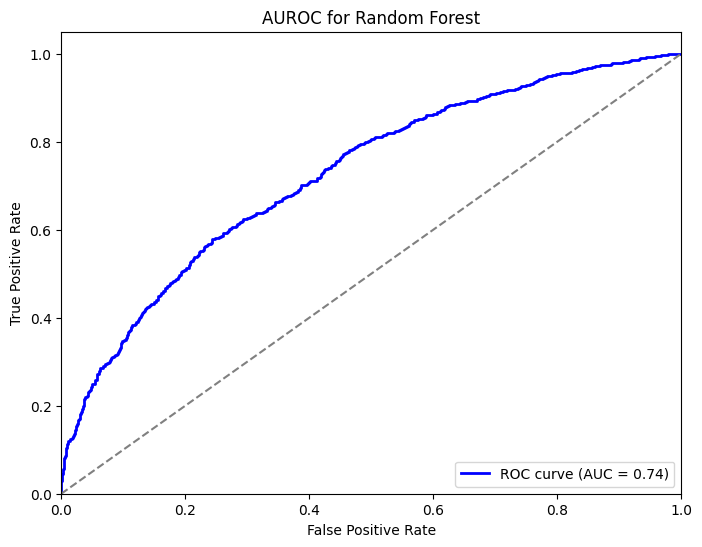

In [ ]:
y_probs = best_model_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Random Forest')
plt.legend(loc='lower right')
plt.show()

##XG Boost


In [ ]:
from xgboost import XGBClassifier


# XGBoost Classifier
xgb_pipeline = XGBClassifier(random_state=42)  # You can adjust parameters as needed

xgb_pipeline.fit(X_train, y_train)

# Predictions using XGBoost model
xgb_y_pred = xgb_pipeline.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_class_report = classification_report(y_test, xgb_y_pred)

print("\nXGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\nClassification Report:")
print(xgb_class_report)

# Calculate AUC-ROC for XGBoost
aucroc_xgb = roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for XGBoost: {aucroc_xgb:.4f}")


XGBoost Classifier:
Accuracy: 0.6566
Confusion Matrix:
[[752 328]
 [411 661]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1080
           1       0.67      0.62      0.64      1072

    accuracy                           0.66      2152
   macro avg       0.66      0.66      0.66      2152
weighted avg       0.66      0.66      0.66      2152

AUC-ROC for XGBoost: 0.7236


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [
{
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]
}
              ]
grid_search = GridSearchCV(
    estimator= xgb_pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_xgb = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_xgb*100))
print("Best Parameters : ",best_parameters )

Best AUC: 76.21
Best Parameters :  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [ ]:
# Get the best model from grid search
best_model_xgb = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_xgb.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_xgb = roc_auc_score(y_test, best_model_xgb.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for XG Boost: {aucroc_xgb:.4f}")

print(f"AUC-ROC for XG Boost: {best_auc_xgb:.4f}")

Accuracy: 0.6701
Confusion Matrix:
[[763 317]
 [393 679]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1080
           1       0.68      0.63      0.66      1072

    accuracy                           0.67      2152
   macro avg       0.67      0.67      0.67      2152
weighted avg       0.67      0.67      0.67      2152

AUC-ROC for XG Boost: 0.7621


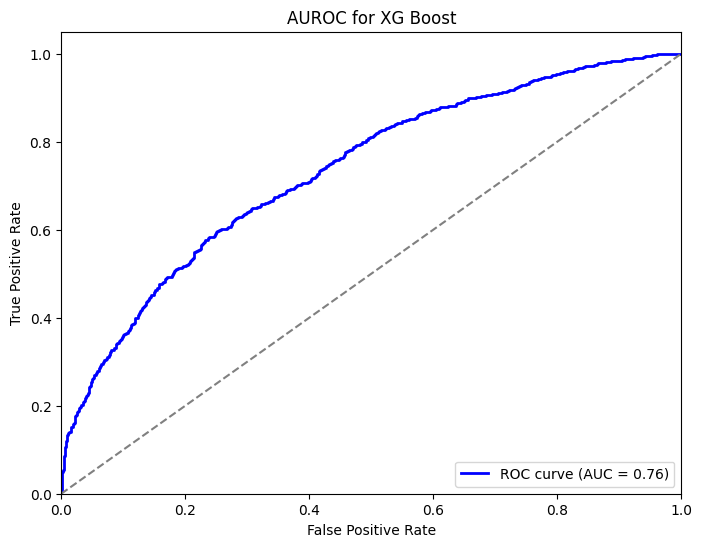

In [ ]:
y_probs = best_model_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for XG Boost')
plt.legend(loc='lower right')
plt.show()

##Cat Boost


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
#CatBoost

from catboost import CatBoostClassifier

# CatBoost Classifier
catboost_pipeline = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4, random_seed=42)  # You can adjust parameters as needed

catboost_pipeline.fit(X_train, y_train, verbose=100)

# Predictions using CatBoost model
catboost_y_pred = catboost_pipeline.predict(X_test)

# Evaluate CatBoost model
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_conf_matrix = confusion_matrix(y_test, catboost_y_pred)
catboost_class_report = classification_report(y_test, catboost_y_pred)

print("\nCatBoost Classifier:")
print(f"Accuracy: {catboost_accuracy:.4f}")
print("Confusion Matrix:")
print(catboost_conf_matrix)
print("\nClassification Report:")
print(catboost_class_report)

# Calculate AUC-ROC for CatBoost
aucroc_catboost = roc_auc_score(y_test, catboost_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for CatBoost: {aucroc_catboost:.4f}")

0:	learn: 0.6817270	total: 50.5ms	remaining: 5s
99:	learn: 0.5536932	total: 575ms	remaining: 0us

CatBoost Classifier:
Accuracy: 0.6705
Confusion Matrix:
[[779 301]
 [408 664]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1080
           1       0.69      0.62      0.65      1072

    accuracy                           0.67      2152
   macro avg       0.67      0.67      0.67      2152
weighted avg       0.67      0.67      0.67      2152

AUC-ROC for CatBoost: 0.7338


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{
 'iterations': [100, 200, 300],  # Number of trees (boosting iterations)
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Tree depth
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization coefficient
    'random_seed': [42]  # Random seed for reproducibility
}
              ]
grid_search = GridSearchCV(
    estimator= catboost_pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_cb = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_cb*100))
print("Best Parameters : ",best_parameters )

0:	learn: 0.6817270	total: 4.5ms	remaining: 895ms
1:	learn: 0.6714281	total: 8.59ms	remaining: 850ms
2:	learn: 0.6636570	total: 12.4ms	remaining: 813ms
3:	learn: 0.6559884	total: 16ms	remaining: 783ms
4:	learn: 0.6501426	total: 19.6ms	remaining: 765ms
5:	learn: 0.6438044	total: 23.2ms	remaining: 750ms
6:	learn: 0.6388360	total: 26.8ms	remaining: 740ms
7:	learn: 0.6351192	total: 30.4ms	remaining: 729ms
8:	learn: 0.6308343	total: 33.8ms	remaining: 717ms
9:	learn: 0.6274152	total: 37.2ms	remaining: 706ms
10:	learn: 0.6249732	total: 40.6ms	remaining: 698ms
11:	learn: 0.6222558	total: 44.2ms	remaining: 692ms
12:	learn: 0.6201185	total: 47.8ms	remaining: 688ms
13:	learn: 0.6173834	total: 51.7ms	remaining: 687ms
14:	learn: 0.6144987	total: 55.1ms	remaining: 680ms
15:	learn: 0.6125064	total: 59ms	remaining: 678ms
16:	learn: 0.6100392	total: 62.5ms	remaining: 672ms
17:	learn: 0.6079261	total: 66.3ms	remaining: 671ms
18:	learn: 0.6065354	total: 69.7ms	remaining: 664ms
19:	learn: 0.6048657	total:

In [ ]:
# Get the best model from grid search
best_model_cb = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_cb.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_cb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_cb = roc_auc_score(y_test, best_model_cb.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for Cat Boost: {aucroc_cb:.4f}")
print(f"AUC-ROC for Cat Boost: {best_auc_cb:.4f}")

0:	learn: 0.6817270	total: 13.8ms	remaining: 2.75s
1:	learn: 0.6714281	total: 23.3ms	remaining: 2.31s
2:	learn: 0.6636570	total: 31.9ms	remaining: 2.09s
3:	learn: 0.6559884	total: 38.8ms	remaining: 1.9s
4:	learn: 0.6501426	total: 66.2ms	remaining: 2.58s
5:	learn: 0.6438044	total: 75.8ms	remaining: 2.45s
6:	learn: 0.6388360	total: 89.5ms	remaining: 2.47s
7:	learn: 0.6351192	total: 98.2ms	remaining: 2.36s
8:	learn: 0.6308343	total: 113ms	remaining: 2.39s
9:	learn: 0.6274152	total: 118ms	remaining: 2.24s
10:	learn: 0.6249732	total: 123ms	remaining: 2.11s
11:	learn: 0.6222558	total: 126ms	remaining: 1.98s
12:	learn: 0.6201185	total: 130ms	remaining: 1.87s
13:	learn: 0.6173834	total: 134ms	remaining: 1.78s
14:	learn: 0.6144987	total: 150ms	remaining: 1.84s
15:	learn: 0.6125064	total: 154ms	remaining: 1.77s
16:	learn: 0.6100392	total: 159ms	remaining: 1.71s
17:	learn: 0.6079261	total: 164ms	remaining: 1.65s
18:	learn: 0.6065354	total: 168ms	remaining: 1.6s
19:	learn: 0.6048657	total: 172ms	r

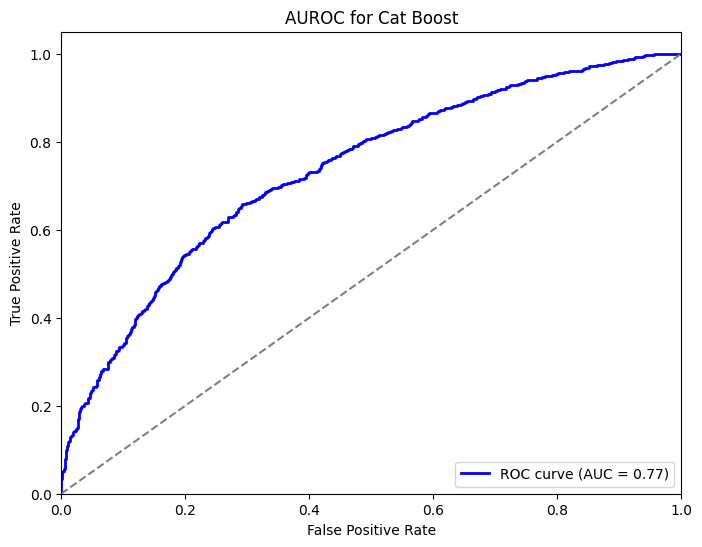

In [ ]:
y_probs = best_model_cb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_cb, tpr_cb, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_cb, tpr_cb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cb, tpr_cb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_cb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Cat Boost')
plt.legend(loc='lower right')
plt.show()

##LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM Classifier
lgbm_pipeline = LGBMClassifier(boosting_type='dart',max_depth=5,random_state=42)  # You can adjust parameters as needed

lgbm_pipeline.fit(X_train, y_train)

# Predictions using LightGBM model
lgbm_y_pred = lgbm_pipeline.predict(X_test)

# Evaluate LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_y_pred)
lgbm_class_report = classification_report(y_test, lgbm_y_pred)

print("\nLightGBM Classifier:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print("Confusion Matrix:")
print(lgbm_conf_matrix)
print("\nClassification Report:")
print(lgbm_class_report)


# Calculate AUC-ROC for LightGBM
aucroc_lgbm = roc_auc_score(y_test, lgbm_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for LightGBM: {aucroc_lgbm:.4f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4173, number of negative: 4435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2627
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484782 -> initscore=-0.060892
[LightGBM] [Info] Start training from score -0.060892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [
{
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]
}
              ]
grid_search = GridSearchCV(
    estimator= lgbm_pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_lgbm = grid_search.best_score_
best_auc_lgbm = best_auc_lgbm
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_lgbm*100))
print("Best Parameters : ",best_parameters )

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4173, number of negative: 4435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2627
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484782 -> initscore=-0.060892
[LightGBM] [Info] Start training from score -0.060892
[LightGBM] [W

In [ ]:
# Get the best model from grid search
best_model_lgbm = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_lgbm.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_lgbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_lgbm = roc_auc_score(y_test, best_model_lgbm.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for LightGBM: {aucroc_lgbm:.4f}")
print(f"AUC-ROC for LightGBM: {best_auc_lgbm:.4f}")

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4173, number of negative: 4435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2627
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484782 -> initscore=-0.060892
[LightGBM] [Info] Start training from score -0.060892
[LightGBM] [W

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Gradient Boosting Machine (GBM) Classifier
gbm_pipeline = GradientBoostingClassifier(random_state=42)  # You can adjust parameters as needed

gbm_pipeline.fit(X_train, y_train)

# Predictions using GBM model
gbm_y_pred = gbm_pipeline.predict(X_test)

# Calculate AUC-ROC for GBM
aucroc_gbm = roc_auc_score(y_test, gbm_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for Gradient Boosting Machine (GBM): {aucroc_gbm:.4f}")
print("\nGradient Boosting Machine (GBM) Classifier:")
print(f"Accuracy: {accuracy_score(y_test, gbm_y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbm_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, gbm_y_pred))
print(f"AUC-ROC: {aucroc_gbm:.4f}")

AUC-ROC for Gradient Boosting Machine (GBM): 0.7307

Gradient Boosting Machine (GBM) Classifier:
Accuracy: 0.6636
Confusion Matrix:
[[766 314]
 [410 662]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1080
           1       0.68      0.62      0.65      1072

    accuracy                           0.66      2152
   macro avg       0.66      0.66      0.66      2152
weighted avg       0.66      0.66      0.66      2152

AUC-ROC: 0.7307


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [
{
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}
              ]
grid_search = GridSearchCV(
    estimator= gbm_pipeline,
    param_grid = parameters,
    scoring= 'roc_auc',
    cv = 10,
    n_jobs= -1
)
grid_search.fit(X_train, y_train)
best_auc_gb = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best AUC: {:.2f}".format(best_auc_gb*100))
print("Best Parameters : ",best_parameters )

Best AUC: 76.10
Best Parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Get the best model from grid search
best_model_gb = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model_gb.fit(X_train, y_train)

# Use logistic regression model for predictions on the test set
y_pred = best_model_gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate AUC-ROC for Logistic Regression
aucroc_gb = roc_auc_score(y_test, best_model_gb.predict_proba(X_test)[:, 1])

# print(f"AUC-ROC for Gradient Boosting: {aucroc_gb:.4f}")
print(f"AUC-ROC for Gradient Boosting: {best_auc_gb:.4f}")

Accuracy: 0.6636
Confusion Matrix:
[[766 314]
 [410 662]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1080
           1       0.68      0.62      0.65      1072

    accuracy                           0.66      2152
   macro avg       0.66      0.66      0.66      2152
weighted avg       0.66      0.66      0.66      2152

AUC-ROC for Gradient Boosting: 0.7610


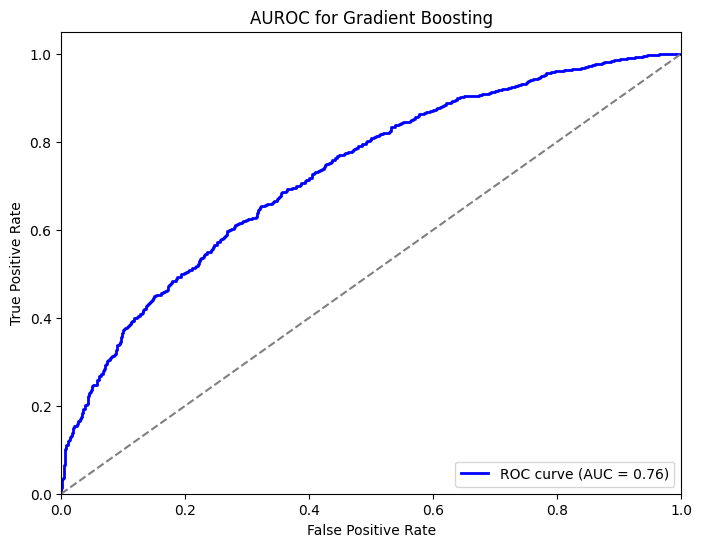

In [ ]:
y_probs = best_model_gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % best_auc_gb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

##Ada Boost

In [ ]:
adaboost_pipeline = AdaBoostClassifier(random_state=42)  # You can adjust parameters as needed

adaboost_pipeline.fit(X_train, y_train)

# Predictions using AdaBoost model

adaboost_y_pred = adaboost_pipeline.predict(X_test)

# Calculate AUC-ROC for AdaBoost
aucroc_adaboost = roc_auc_score(y_test, adaboost_pipeline.predict_proba(X_test)[:, 1])

print(f"AUC-ROC for AdaBoost: {aucroc_adaboost:.4f}")
print("\nAdaBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, adaboost_y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, adaboost_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, adaboost_y_pred))
print(f"AUC-ROC: {aucroc_adaboost:.4f}")

AUC-ROC for AdaBoost: 0.7119

AdaBoost Classifier:
Accuracy: 0.6524
Confusion Matrix:
[[718 362]
 [386 686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      1080
           1       0.65      0.64      0.65      1072

    accuracy                           0.65      2152
   macro avg       0.65      0.65      0.65      2152
weighted avg       0.65      0.65      0.65      2152

AUC-ROC: 0.7119


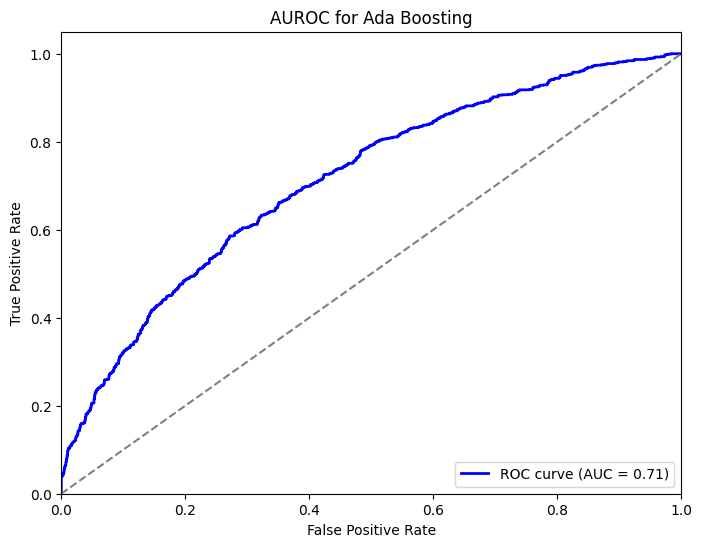

In [ ]:
y_probs = adaboost_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_ab, tpr_ab, thresholds = roc_curve(y_test, y_probs)
roc_auc_ab = auc(fpr_ab, tpr_ab)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab, tpr_ab, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_ab)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Ada Boosting')
plt.legend(loc='lower right')
plt.show()

##Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the list of classifiers to be included in the ensemble
classifiers = [
    ('logistic', pipeline),
    ('random_forest', rf_pipeline),
    ('xgboost', xgb_pipeline),
    ('lightgbm', lgbm_pipeline),
    ('gbm', gbm_pipeline),
    ('adaboost', adaboost_pipeline)
]

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Fit the ensemble model to the training data
voting_clf.fit(X_train, y_train)

# Predictions using the ensemble model
voting_y_pred = voting_clf.predict(X_test)

# Calculate AUC-ROC for AdaBoost
aucroc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])

# Calculate accuracy, confusion matrix, and classification report for the ensemble model
print("\nEnsemble Model (Voting Classifier):")
print(f"Accuracy: {accuracy_score(y_test, voting_y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, voting_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, voting_y_pred))
print(f"AUC-ROC: {aucroc_voting:.4f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4173, number of negative: 4435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2627
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484782 -> initscore=-0.060892
[LightGBM] [Info] Start training from score -0.060892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the ensemble model
voting_y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate AUC-ROC score using predicted probabilities
auc_roc = roc_auc_score(y_test, voting_y_prob)
print("AUC-ROC Score:", auc_roc)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
AUC-ROC Score: 0.7403961097291322
